In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("retail_sales.csv")

In [30]:
df

,Order ID,Order Date,Region,Product Category,Sub-Category,Sales,Profit,Quantity,Discount
0,ORD-1000,2022-04-13,West,Furniture,Tables,1597.16,158.64,8,0.2
1,ORD-1001,2023-09-07,East,Furniture,Chairs,902.75,-29.92,8,0.2
2,ORD-1002,2023-10-26,East,Office Supplies,Binders,1308.76,210.71,2,0.0
3,ORD-1003,2023-02-18,Central,Furniture,Bookcases,440.43,47.89,5,0.3
4,ORD-1004,2022-11-10,Central,Office Supplies,Pens,1059.02,-57.60,9,0.3
...,...,...,...,...,...,...,...,...,...
195,ORD-1195,2023-02-11,East,Office Supplies,Binders,263.17,-30.85,5,0.0
196,ORD-1196,2023-02-24,East,Office Supplies,Binders,266.83,62.69,1,0.0
197,ORD-1197,2023-07-21,East,Furniture,Bookcases,470.24,-4.87,5,0.2
198,ORD-1198,2022-11-05,West,Furniture,Tables,683.69,-135.15,9,0.3


In [4]:
df.describe()

,Sales,Profit,Quantity,Discount
count,200.000000,200.000000,200.000000,200.000000
mean,1003.594550,51.525400,5.105000,0.144500
std,571.720224,155.632207,2.688889,0.111498
min,30.930000,-322.230000,1.000000,0.000000
25%,517.772500,-32.300000,3.000000,0.000000
50%,972.210000,21.195000,5.000000,0.150000
75%,1493.285000,137.372500,8.000000,0.200000
max,1995.530000,575.330000,9.000000,0.300000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          200 non-null    object 
 1   Order Date        200 non-null    object 
 2   Region            200 non-null    object 
 3   Product Category  200 non-null    object 
 4   Sub-Category      200 non-null    object 
 5   Sales             200 non-null    float64
 6   Profit            200 non-null    float64
 7   Quantity          200 non-null    int64  
 8   Discount          200 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 14.2+ KB


In [11]:
df.isnull().sum()

Order ID            0
Order Date          0
Region              0
Product Category    0
Sub-Category        0
Sales               0
Profit              0
Quantity            0
Discount            0
dtype: int64

In [13]:
df.shape

(200, 9)

In [15]:
df['Sales'] = df['Sales'].astype(int)
df['Profit'] = df['Profit'].astype(int)
df['Discount'] = df['Discount'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          200 non-null    object
 1   Order Date        200 non-null    object
 2   Region            200 non-null    object
 3   Product Category  200 non-null    object
 4   Sub-Category      200 non-null    object
 5   Sales             200 non-null    int32 
 6   Profit            200 non-null    int32 
 7   Quantity          200 non-null    int64 
 8   Discount          200 non-null    int32 
dtypes: int32(3), int64(1), object(5)
memory usage: 11.8+ KB


## Q1: Exploratory Visualization

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


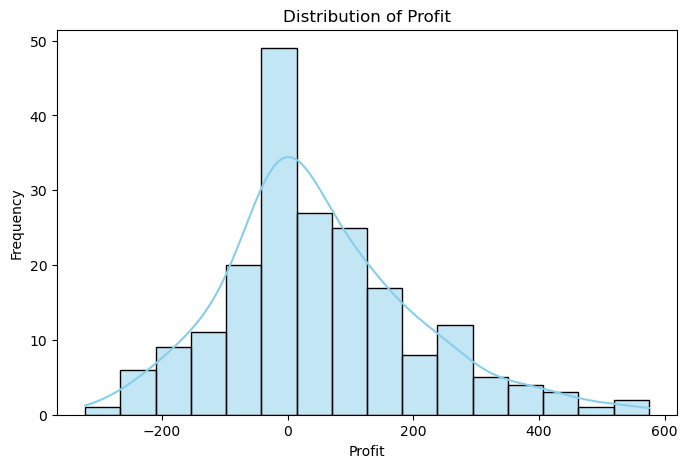

In [22]:
# Q1a: Distribution of Profit
plt.figure(figsize=(8, 5))
sns.histplot(df['Profit'], kde=True, color='skyblue')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

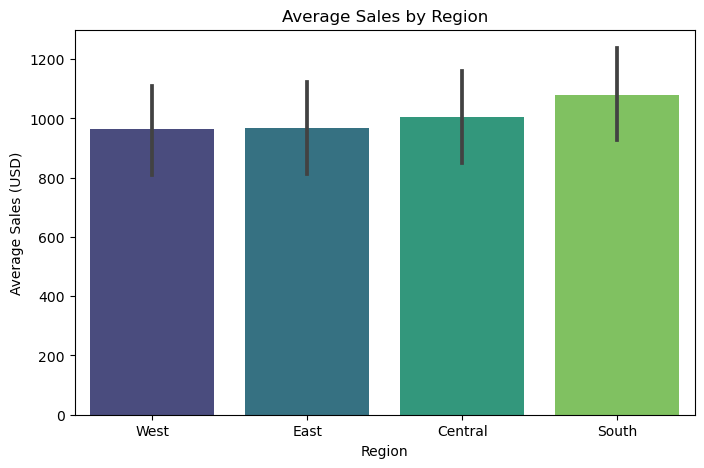

In [32]:
# Q1b: Barplot of Average Sales by Region
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Region', y='Sales', estimator=np.mean, palette='viridis')
plt.title('Average Sales by Region')
plt.ylabel('Average Sales (USD)')
plt.show()

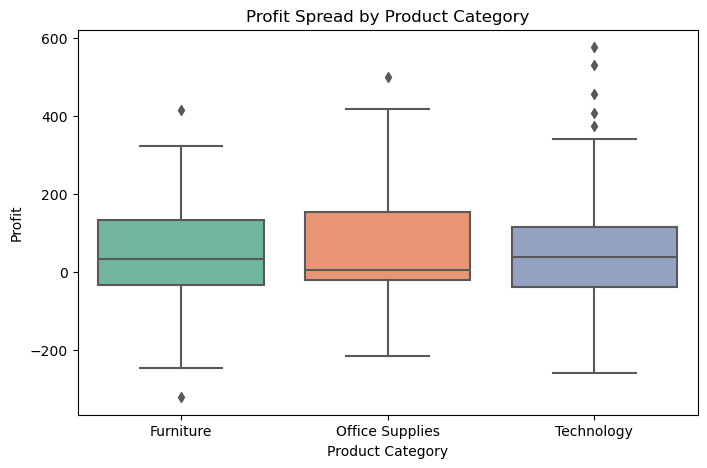

In [38]:
# Q1c: Boxplot of Profit by Product Category
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Product Category', y='Profit', palette='Set2')
plt.title('Profit Spread by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.show()

## Q2: Time Series Visualization

In [40]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [42]:
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

In [44]:
monthly_summary = df.groupby('YearMonth').agg({'Sales': 'sum','Profit': 'sum'}).reset_index()

In [46]:
monthly_summary['NegativeProfit'] = monthly_summary['Profit'] < 0

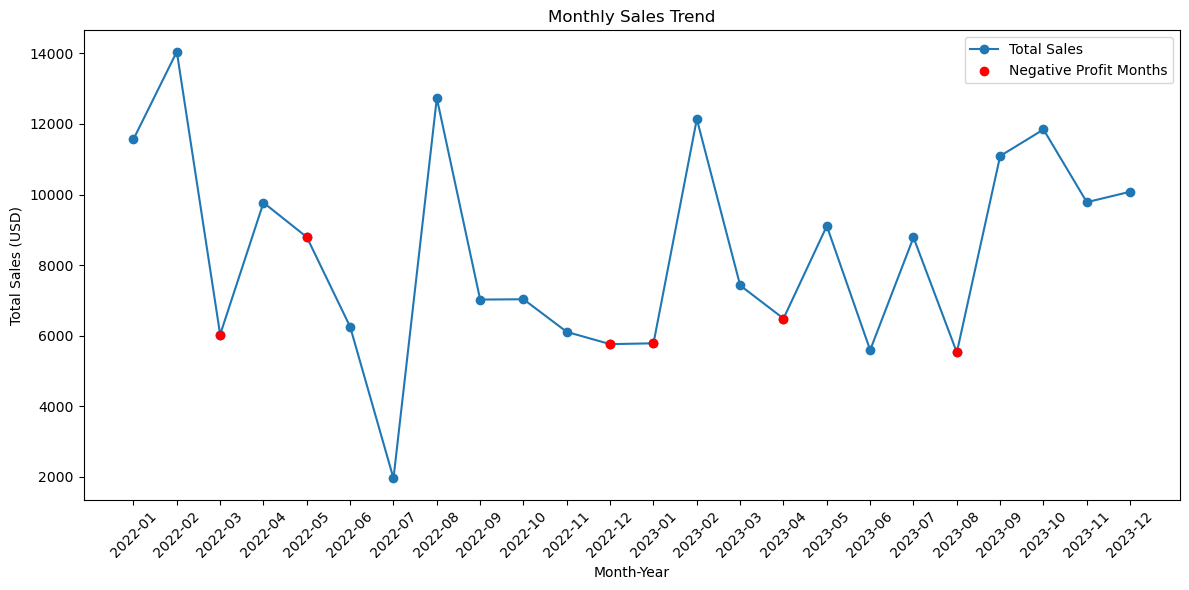

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_summary['YearMonth'], monthly_summary['Sales'], marker='o', label='Total Sales')

# Highlight months with negative profit
neg_months = monthly_summary[monthly_summary['NegativeProfit']]
plt.scatter(neg_months['YearMonth'], neg_months['Sales'], color='red', label='Negative Profit Months', zorder=5)

plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Q3: Correlation Heatmap

In [50]:
corr_data = df[['Sales', 'Profit', 'Quantity', 'Discount']]

In [52]:
corr_matrix = corr_data.corr()

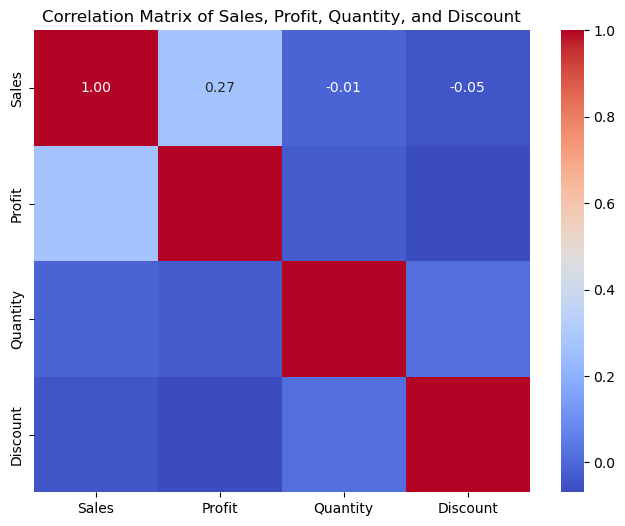

In [54]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sales, Profit, Quantity, and Discount')
plt.show()

## Q4: Custom Plot Styling

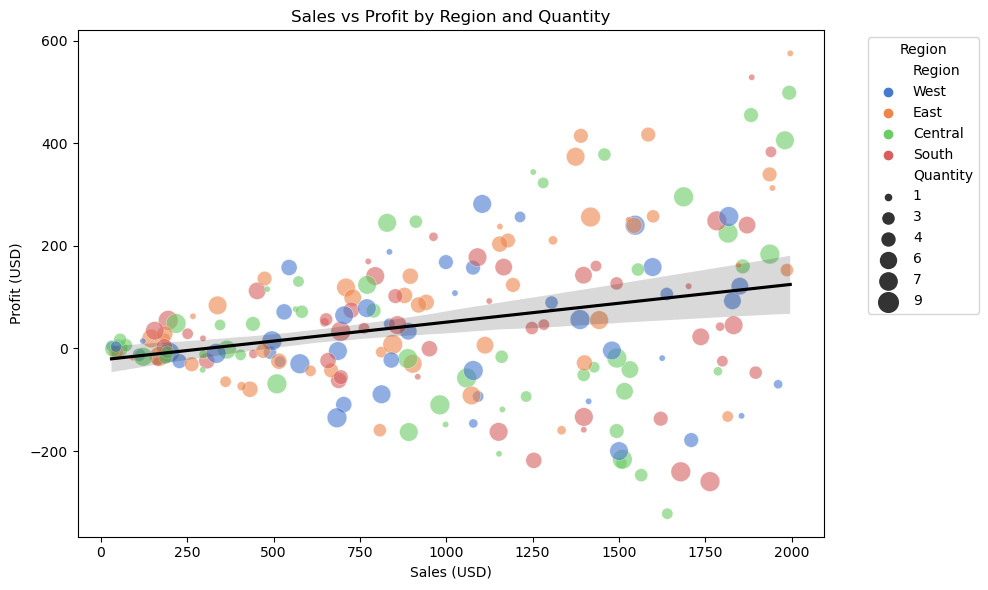

In [60]:
# Createing Scatter Plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='Sales', y='Profit', size='Quantity', hue='Region', alpha=0.6, palette='muted', sizes=(20, 200))
# Adding Trendline
sns.regplot(data=df, x='Sales', y='Profit', scatter=False, color='black')

plt.title('Sales vs Profit by Region and Quantity')
plt.xlabel('Sales (USD)')
plt.ylabel('Profit (USD)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
